**PANDAS JOIN**

Proses combine dua kolom dari tabel yang berbeda. Dilakukan dengan merge dari adanya relasi.

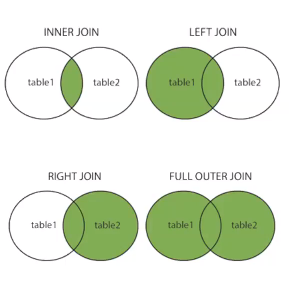

In [1]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=08cbbaad788a78267a2162152470d9dcd975e7db952d16901a0f6e121e6f5d4f
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandasql as ps

In [3]:
dict_1={
    "id":[1,2,3,4],
    "name":['Budi','Yosua','Adel','Dinda']
}

df1=pd.DataFrame(dict_1)
df1

,id,name
0,1,Budi
1,2,Yosua
2,3,Adel
3,4,Dinda


In [4]:
dict_2={
    "id":[1,2,3,5,6],
    "age":[20,30,40,20,25]
}

df2=pd.DataFrame(dict_2)
df2

,id,age
0,1,20
1,2,30
2,3,40
3,5,20
4,6,25


#Inner Join

In [5]:
#inner join

df_temp = pd.merge(df1,df2,how="inner")
df_temp

,id,name,age
0,1,Budi,20
1,2,Yosua,30
2,3,Adel,40


In [6]:
#inner join
#style berbeda
df_temp = df1.merge(df2,how="inner")
df_temp

,id,name,age
0,1,Budi,20
1,2,Yosua,30
2,3,Adel,40


#Left Join

In [7]:
#left join

df_temp = pd.merge(df1,df2,how="left")
df_temp

,id,name,age
0,1,Budi,20.0
1,2,Yosua,30.0
2,3,Adel,40.0
3,4,Dinda,NaN


In [8]:
#left join
#style berbeda
df_temp = df1.merge(df2,how="left")
df_temp

,id,name,age
0,1,Budi,20.0
1,2,Yosua,30.0
2,3,Adel,40.0
3,4,Dinda,NaN


#Right Join

In [9]:
#right join

df_temp = pd.merge(df1,df2,how="right")
df_temp

,id,name,age
0,1,Budi,20
1,2,Yosua,30
2,3,Adel,40
3,5,NaN,20
4,6,NaN,25


In [10]:
#right join
#style berbeda
df_temp = df1.merge(df2,how="right")
df_temp

,id,name,age
0,1,Budi,20
1,2,Yosua,30
2,3,Adel,40
3,5,NaN,20
4,6,NaN,25


In [11]:
#Dari right diubah menjadi left
#Tabelnya perlu ditukar 

df_temp = pd.merge(df2,df1,how="left")
df_temp

,id,age,name
0,1,20,Budi
1,2,30,Yosua
2,3,40,Adel
3,5,20,NaN
4,6,25,NaN


In [12]:
#Outer menggabungkan semua
pd.merge(df1,df2,how="outer")

,id,name,age
0,1,Budi,20.0
1,2,Yosua,30.0
2,3,Adel,40.0
3,4,Dinda,NaN
4,5,NaN,20.0
5,6,NaN,25.0


In [13]:
dict_1={
    "nim":['M1','M2','M3','M4'],
    "name":['Budi','Yosua','Adel','Dinda']
}

df1=pd.DataFrame(dict_1)
df1

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [14]:
dict_2={
    "nim":['M1','M2','M3','M5','M6'],
    "age":[20,30,40,20,25]
}

df2=pd.DataFrame(dict_2)
df2

,nim,age
0,M1,20
1,M2,30
2,M3,40
3,M5,20
4,M6,25


In [15]:
dict_3={
    "nim_a":['M1','M2','M3','M4'],
    "name":['Budi','Yosua','Adel','Dinda']
}

df3=pd.DataFrame(dict_3)
df3

,nim_a,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [16]:
dict_4={
    "nim_b":['M1','M2','M3','M5','M6'],
    "age":[20,30,40,20,25]
}

df4=pd.DataFrame(dict_4)
df4

,nim_b,age
0,M1,20
1,M2,30
2,M3,40
3,M5,20
4,M6,25


In [17]:
#inner join data frame 1 dan 2

df_temp = pd.merge(df1,df2,how="inner", on = 'nim')
df_temp

,nim,name,age
0,M1,Budi,20
1,M2,Yosua,30
2,M3,Adel,40


In [18]:
df_temp = df1.merge(df2,how="inner", on = 'nim')
df_temp

,nim,name,age
0,M1,Budi,20
1,M2,Yosua,30
2,M3,Adel,40


In [19]:
#Inner Circle dataframe 3 dan 4
#Menggabungkan nama kolom yang berbeda tapi isi sama
#Bisa menggunakan left on (based nim a) , right on (based nim b)

df_temp = pd.merge(df3,df4,how="inner",left_on = 'nim_a', right_on = 'nim_b')
df_temp

,nim_a,name,nim_b,age
0,M1,Budi,M1,20
1,M2,Yosua,M2,30
2,M3,Adel,M3,40


In [20]:
df_temp = pd.merge(df3,df4,how="left",left_on = 'nim_a', right_on = 'nim_b')
df_temp

,nim_a,name,nim_b,age
0,M1,Budi,M1,20.0
1,M2,Yosua,M2,30.0
2,M3,Adel,M3,40.0
3,M4,Dinda,NaN,NaN


#Data Frame With SQL

In [67]:
def dataset():
    q='''
        select
            *   
        from df3
        join df4 on df3.nim_a=df4.nim_b
    '''
    return q

dataset = ps.sqldf(dataset())
dataset

ObjectNotExecutableError: ignored

#Appending Dataframe

**APPENDING DATAFRAME**

Appending konsepnya nambah row

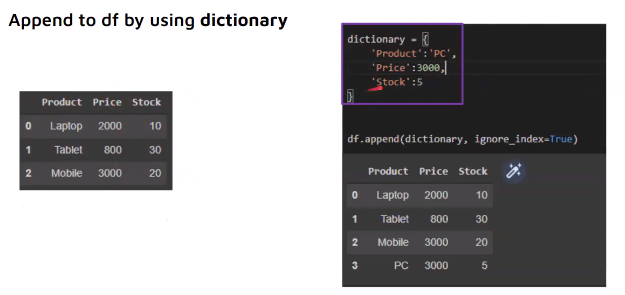

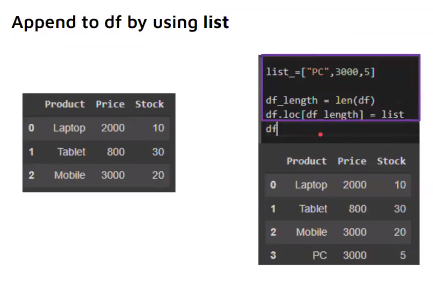

In [24]:
#Appending row

df = df1.copy()
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [25]:
#Menambah baris dari data yg ditambahkan
new_dict={
    'nim':'M9',
    'name':'Siti'
}

In [26]:
df=df.append(new_dict,ignore_index=True)
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda
4,M9,Siti


In [27]:
#Kasus berbentuk data frame
new_dict_={
    'nim':['M9'],
    'name':['Siti'],
    'hobby' : ['membaca']
}
df_new = pd.DataFrame.from_dict(new_dict_)
df_new

,nim,name,hobby
0,M9,Siti,membaca


In [28]:
df=df.append(df_new)
df

,nim,name,hobby
0,M1,Budi,NaN
1,M2,Yosua,NaN
2,M3,Adel,NaN
3,M4,Dinda,NaN
4,M9,Siti,NaN
0,M9,Siti,membaca


In [29]:
#Menambahkan Kolom
df = df1.copy()
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [30]:
#Ketika membuat list
#Lengthnya harus pas sesuai index tabel
list_age = [10,20,30,40]
list_age

[10, 20, 30, 40]

In [31]:
df['age'] = list_age
df

,nim,name,age
0,M1,Budi,10
1,M2,Yosua,20
2,M3,Adel,30
3,M4,Dinda,40


In [32]:
df = df1.copy()
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [33]:
listku = ['M5','Arif']
listku

['M5', 'Arif']

In [34]:
df.loc[len(df)] = listku
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda
4,M5,Arif


#Renaming Kolom

**RENAMING KOLOM**

Dapat merename kolom menggunakan syntax.


In [35]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
df = df.rename(columns ={
    'fare':'price'
})
df

,survived,pclass,sex,age,sibsp,parch,price,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
df.rename(columns ={
    'fare':'price'
}, inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,price,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [38]:
df=df1.copy()
df

,nim,name
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [39]:
#Cara jika jumlah kolomnya sedikit
df.columns = ['Nim Mhs','Nama Mhs']
df

,Nim Mhs,Nama Mhs
0,M1,Budi
1,M2,Yosua
2,M3,Adel
3,M4,Dinda


In [40]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
df.rename(columns = {'price':'harga'}, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,harga,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df=df.rename(columns = {'price':'harga'})
df.head()

,carat,cut,color,clarity,depth,table,harga,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#Deleting Coloumn

**DELETING COLOM**

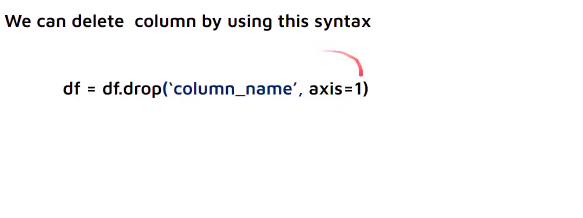


In [43]:
#Axis 0 : index
#Axis 1 : kolom

In [69]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [45]:
df = df.drop('x',axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.35,2.75


In [70]:
df = df.drop(['x','y','z'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [48]:
#Drop Row (baris)
#Jika kolom menambahkan axis = 1
df.drop([0])

,carat,cut,color,clarity,depth,table,price,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.96,2.48
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.12,3.74


#Filtering Data

**FILTERING DATA**

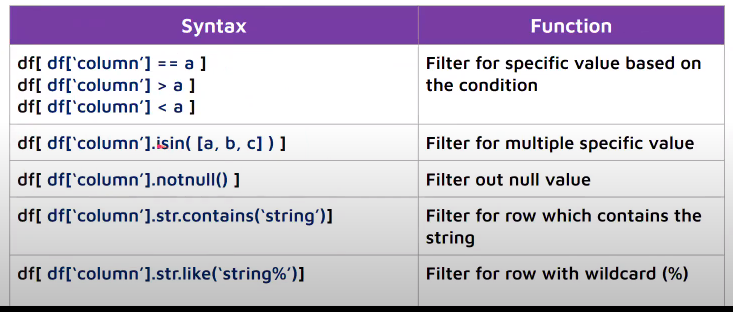



In [90]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [81]:
df[df['embark_town'].isin(['Southampton','Queenstown'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [82]:
df_temp = df[df['embark_town'].isin(['Southampton','Queenstown'])]
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [83]:
#value embark_town tidak ada Queenstown
#Gunakan tanda negasi (~)
df[~df['embark_town'].isin(['Queenstown'])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [92]:
def dataset():
    q='''
        select
            *   
        from df
        where embark_town not in ('Queenstown')
    '''
    return q

dataset = ps.sqldf(dataset())
dataset.head()

ObjectNotExecutableError: ignored

In [85]:
#notnull
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [86]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [87]:
#Tidak ada null
df[df['age'].notnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [88]:
#Kebalikan dari not null
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [93]:
#Kebalikan notnull
df[~df['age'].notnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [94]:
df_taxi = sns.load_dataset('taxis')
df_taxi = df_taxi.dropna()
df_taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [97]:
#Ambilkan data yang katanya mengandung 'ja'
df_taxi[df_taxi['pickup_zone'].str.contains('Ja')].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
2186,2019-03-05 23:20:47,2019-03-05 23:43:48,3,7.84,25.0,0.00,5.76,34.56,yellow,cash,Jackson Heights,Clinton East,Queens,Manhattan
2191,2019-03-25 16:04:47,2019-03-25 16:48:51,1,13.11,52.0,13.11,5.76,78.67,yellow,credit card,South Jamaica,Flushing Meadows-Corona Park,Queens,Queens
3471,2019-03-17 19:01:09,2019-03-17 19:33:20,2,14.10,40.0,0.00,0.00,40.80,yellow,credit card,South Jamaica,Fort Greene,Queens,Brooklyn
4057,2019-03-29 22:23:08,2019-03-29 22:52:37,5,15.14,52.0,0.00,5.76,61.06,yellow,cash,Jamaica,Upper West Side North,Queens,Manhattan
4996,2019-03-07 07:14:52,2019-03-07 07:49:33,1,10.90,35.0,11.45,0.00,49.75,yellow,credit card,Jackson Heights,TriBeCa/Civic Center,Queens,Manhattan


In [99]:
#STARTSWITH
df_taxi[df_taxi['pickup_zone'].str.startswith('Ja')].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
2186,2019-03-05 23:20:47,2019-03-05 23:43:48,3,7.84,25.00,0.00,5.76,34.56,yellow,cash,Jackson Heights,Clinton East,Queens,Manhattan
4057,2019-03-29 22:23:08,2019-03-29 22:52:37,5,15.14,52.00,0.00,5.76,61.06,yellow,cash,Jamaica,Upper West Side North,Queens,Manhattan
4996,2019-03-07 07:14:52,2019-03-07 07:49:33,1,10.90,35.00,11.45,0.00,49.75,yellow,credit card,Jackson Heights,TriBeCa/Civic Center,Queens,Manhattan
5556,2019-03-20 06:25:05,2019-03-20 07:22:47,1,16.68,40.56,0.00,0.00,41.06,green,credit card,Jamaica Estates,Boerum Hill,Queens,Brooklyn
5589,2019-03-21 12:55:50,2019-03-21 13:54:29,1,15.70,40.51,0.00,0.00,41.01,green,credit card,Jamaica Estates,Midtown North,Queens,Manhattan


#SORT VALUES

In [101]:
df_temp = df.sort_values('fare', ascending=False)
df_temp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
822,0,1,male,38.0,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
732,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [103]:
df = sns.load_dataset('titanic')
df.head(3)

df_temp = df.sort_values('fare', ascending=False).reset_index(drop=True)
df_temp.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
1,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
2,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
3,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
4,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False


#Data Aggregation

Data agregat yang sudah dimanipulasi menggunakan metode group by

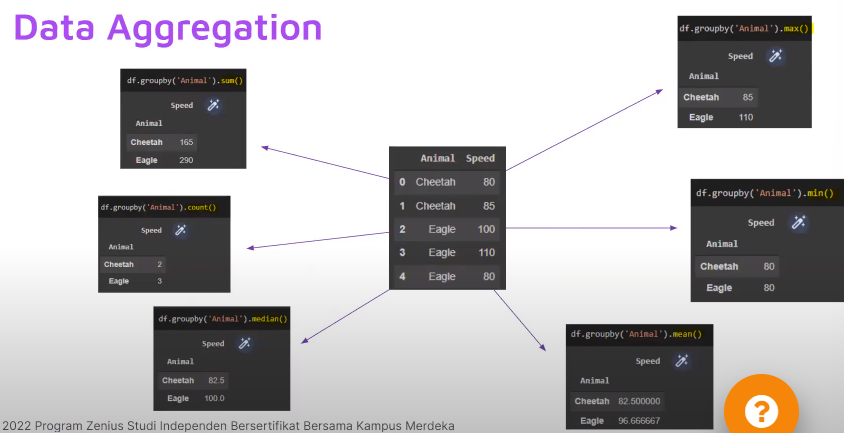

In [104]:
df = sns.load_dataset('titanic')
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [107]:
#Berapa jumlah harga tiket (fare) untuk survived 1 dan 0
df.groupby('survived').agg({'fare':['sum']})

,fare
,sum
survived,
0,12142.7199
1,16551.2294


In [110]:
#Berapa jumlah harga tiket (fare) untuk survived dan Pclass
df.groupby(['survived','pclass']).agg({'fare':['sum']})

fare
                        sum
survived pclass            
0        1        5174.7206
         2        1882.9958
         3        5085.0035
1        1       13002.6919
         2        1918.8459
         3        1629.6916

In [111]:
df.groupby(['survived','pclass']).agg({'fare':['sum','min','max','mean','median']})

fare                                       
                        sum      min       max       mean   median
survived pclass                                                   
0        1        5174.7206   0.0000  263.0000  64.684007  44.7500
         2        1882.9958   0.0000   73.5000  19.412328  13.0000
         3        5085.0035   0.0000   69.5500  13.669364   8.0500
1        1       13002.6919  25.9292  512.3292  95.608029  77.9583
         2        1918.8459  10.5000   65.0000  22.055700  21.0000
         3        1629.6916   0.0000   56.4958  13.694887   8.5167

In [119]:
#Challange
#Ambil percentile 75

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_


In [120]:
df.groupby(['survived','pclass']).agg({'fare':['sum','min','max','mean','median', percentile(75), percentile(90)]})

fare                                         \
                        sum      min       max       mean   median   
survived pclass                                                      
0        1        5174.7206   0.0000  263.0000  64.684007  44.7500   
         2        1882.9958   0.0000   73.5000  19.412328  13.0000   
         3        5085.0035   0.0000   69.5500  13.669364   8.0500   
1        1       13002.6919  25.9292  512.3292  95.608029  77.9583   
         2        1918.8459  10.5000   65.0000  22.055700  21.0000   
         3        1629.6916   0.0000   56.4958  13.694887   8.5167   

                                             
                percentile_75 percentile_90  
survived pclass                              
0        1          78.937500     151.55000  
         2          26.000000      31.24248  
         3          15.136450      29.00250  
1        1         111.481225     188.10210  
         2          26.250000      34.50000  
         3          15.875000      22.35830

In [122]:
#GUNAKAN SQL
def dataagg():
    q='''
        select
            class,
            avg(fare) as avg_fare,
            avg(age) as avg_age,
            sum(fare) as total_fare   
        from df
        group by 1
    '''
    return q

df_sql = ps.sqldf(dataagg())
df_sql.head()

ObjectNotExecutableError: ignored

#PANDAS FUNCTION

In [123]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [124]:
#Melakukan mapping 
map_class = {'First':3,
             'Second':2,
             'Third':1}
df['class_cat'] = df['class'].map(map_class)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [125]:
#Menggunakan panjang dari suatu string
df['len_embark_town'] = df['embark_town'].str.len()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_cat,len_embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,11.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,9.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,11.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,11.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,11.0


In [128]:
#Membuat suatu grup 'fare group' -> 14 then 'mahal' else 'murah'
df['fare_group_v1'] = df['fare'].apply(lambda x : 'mahal' if x>14 else 'murah')
df.head()
#Jika masih sederhana bisa menggunakan cara ini

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_cat,len_embark_town,fare_group,fare_group_v1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,11.0,Murah,murah
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,9.0,Mahal,mahal
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,11.0,Murah,murah
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,11.0,Mahal,mahal
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,11.0,Murah,murah


In [130]:
#Cara ketika mulai kompleks syaratnya
def fare_group(x):
  if x >=0 and x <= 14:
    return 'murah'
  elif x > 14 and x <= 31:
    return 'sedang'
  else:
    return 'mahal'

df['fare_group_v1']=df['fare'].apply(lambda x : fare_group(x))
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_cat,len_embark_town,fare_group,fare_group_v1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,11.0,Murah,murah
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,9.0,Mahal,mahal
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,11.0,Murah,murah
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,11.0,Mahal,mahal
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,11.0,Murah,murah


In [131]:
def group_age(x):
  if x['age'] > 0  and x['age'] <= 10 and x['sex']=='female':
    return 'anak-anak perempuan'
  if x['age'] > 0  and x['age'] <= 10 and x['sex']=='male':
    return 'anak-anak laki-laki'
  elif x['age'] > 10  and x['age'] <=20:
    return 'remaja'
  elif x['age'] > 20  and x['age'] <=40:
    return 'dewasa'
  elif x['age'] > 40  and x['age'] <=60:
    return 'bapak-bapak'
  elif x['age'] > 60: 
    return 'tua'

In [132]:
#dituliskan df saja karena mencangkup beberapa kolom seperti age, sex, dsb
df['group_age'] = df.apply(lambda x : group_age(x), axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_cat,len_embark_town,fare_group,fare_group_v1,group_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,11.0,Murah,murah,dewasa
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,9.0,Mahal,mahal,dewasa
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,11.0,Murah,murah,dewasa
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,11.0,Mahal,mahal,dewasa
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,11.0,Murah,murah,dewasa


#PANDAS DATE PROCESSING

In [133]:
df=pd.read_csv('http://bit.ly/uforeports')
df

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [135]:
df['Time'] = pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18216 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB


In [136]:
# weekdays naik, weekend turun
# long weekend -> drop
# holiday -> drop
# awal bulan atau akhir bulan mempengaruhi transaksi
#Faktor tersebut mengakibatkan perlu mengekstrak data

In [144]:
#Data ini dibutuhkan ketika menggunakan suatu forecasting tradisional
df['year'] = df['Time'].dt.year

df['month'] = df['Time'].dt.month

df['dayoftheyear'] = df['Time'].dt.dayofyear

df['dayofweek']=df.Time.dt.dayofweek

df['dayname'] = df['Time'].dt.day_name()

df['hour']=df.Time.dt.hour

df['second']=df.Time.dt.second

df.head()

,City,Colors Reported,Shape Reported,State,Time,year,month,dayoftheyear,dayofweek,dayname,hour,second
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,6,152,6,Sunday,22,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,6,181,0,Monday,20,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,2,46,6,Sunday,14,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,6,152,0,Monday,13,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,4,108,1,Tuesday,19,0


In [146]:
#https://filip-wojcik.com/talks/xgboost_forecasting_eng.pdf